<a href="https://colab.research.google.com/github/michaelcalvinwood/ml-base-models/blob/main/Multi_Class_Images_Accurate_MNIST_via_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 1s 0us/step


## Analyze the Data

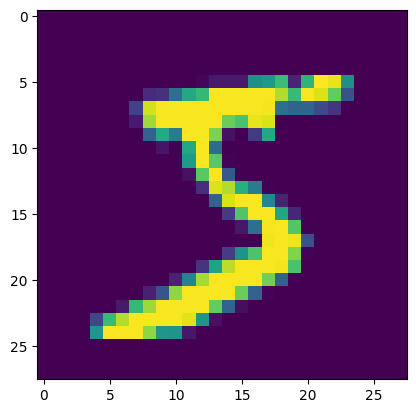

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
type(x_train)

numpy.ndarray

## Prepare the Data

In [ ]:
# reshape the data to match the format that the model expects (num entries, width, height, num_color_channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train[2]

4

In [ ]:
import tensorflow as tf
# change labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Build the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)


Epoch 1/3
1875/1875 [==============================] - 20s 5ms/step - loss: 0.2136 - accuracy: 0.9507 - val_loss: 0.0874 - val_accuracy: 0.9729
Epoch 2/3
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0687 - accuracy: 0.9785 - val_loss: 0.0860 - val_accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0474 - accuracy: 0.9849 - val_loss: 0.0973 - val_accuracy: 0.9736


## Analyze the Model Performance

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred.shape


(10000, 10)

In [ ]:
y_pred[0]

array([1.38878677e-08, 6.47438917e-14, 3.24202404e-07, 2.84897783e-06,
       6.21050737e-12, 1.05705575e-11, 1.90893613e-15, 9.99996781e-01,
       1.98702814e-08, 2.58733550e-08], dtype=float32)

In [ ]:
y_pred[0].argmax() # the largest value is the prediction


7

In [ ]:
y_pred =  ((y_pred).argmax(axis=1))
y_true = (y_test.argmax(axis=1))

In [ ]:
y_pred[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_true,y_pred,output_dict=True)

<Axes: >

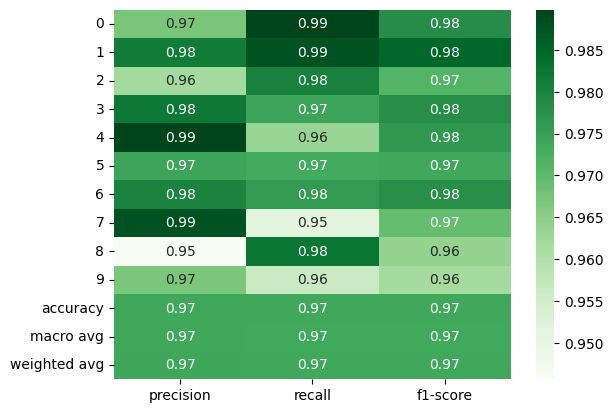

In [ ]:
import seaborn as sns
import pandas as pd
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, cmap="Greens",annot=True)